# JNB Lab Solutions

In [5]:
# import libraries
# Always run this cell first!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import powerlaw
from scipy import integrate
from scipy.integrate import odeint
import math
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
import scipy
import statsmodels.api # appear to need to import the api as well as the library itself for the interpreter to find the modules
import statsmodels as sm
from matplotlib import ticker
import seaborn as sns
import plotly.graph_objects as go
import plotly.offline
plotly.offline.init_notebook_mode(connected=True) # make plotly work with Jupyter Notebook using CDN
from scipy.stats import linregress
import folium
from folium.plugins import MarkerCluster

# an extra function for plotting a straight line
def plot_abline(slope, intercept, color = None, x_name = "x", y_name = "y"):
    """Plot a line from slope and intercept"""
    axes = plt.gca()
    x_vals = np.array(axes.get_xlim())
    y_vals = intercept + slope * x_vals
    plt.plot(
        x_vals, y_vals, '--', color = color,
        label = f"${y_name} = {slope:.2f}{x_name} " + ("-" if intercept < 0 else "+") + f"{abs(intercept):.2f}$"
    )

## Bifurcations

Solution to Problem 1

In [2]:
def rmpp(x0,y0,K):
    from scipy.integrate import odeint
    import matplotlib.pyplot as plt
    import numpy as npy
    import random

    # timestep determines the accuracy of the euler method of integration
    timestep = 0.001
    # amplitude of noise term
    amp = 0.
    # the time at which the simulation ends
    end_time = 500

    # creates a time vector from 0 to end_time, seperated by a timestep
    t = npy.arange(0,end_time,timestep)

    # intialize rabbits (x) and foxes (y) vectors
    x = []
    y = []

    """" parameters"""

    r = .5
    a=5
    h=3
    e=.5
    m=.1

    """ euler integration """

    # initial conditions for the rabbit (x) and fox (y) populations at time=0
    x0=x0
    y0=y0
    x.append(x0)
    y.append(y0) 

    # forward euler method of integration
    # a perturbbation term is added to the differentials to make the simulation stochastic
    for index in range(1,len(t)):

        # evaluate the current differentials
        xd = r*x[index-1]*(1-x[index-1]/K) - a * x[index-1]*y[index-1]/(1+a*h*x[index-1])
        yd = e*a*x[index-1]*y[index-1]/(1+a*h*x[index-1])-m*y[index-1]

        # evaluate the next value of x and y using differentials
        next_x = x[index-1] + xd * timestep
        next_y = y[index-1] + yd * timestep

        x.append(next_x)
        y.append(next_y)

    """ visualization """

    if amp == 0:    
        # visualization of deterministic populations against time
        plt.figure(figsize=(2,1))
        plt.plot(x, y)
        plt.xlim=[0,.25]
        plt.ylim=[0,.25]
        plt.ylabel('Predator Density')
        plt.xlabel('Prey Density')
        plt.text(x0,y0,'o',ha='center', va='center',color='r')
        plt.text(x0,y0,' Initial Point',ha='left', va='center',color='r')
        plt.title('Predator-Prey K='+str(K))
        plt.savefig("K.png")
        plt.show()
    return

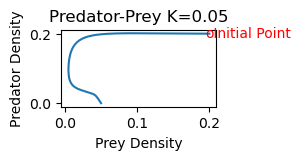

In [3]:
# Probkem 1b
rmpp(.2,.2,.05)

Solution to Problem 2a)

<img src="fig11.png" alt="Drawing" style="width: 500px;"/>

2b) As K increases, the equilibrium point shifts stability from one with zero predator concentration to one with positive predator concentration. Increasing K further, the equilibrium is still stable, but the solution spirals around the equilibrium point on its approach toward the equilibrium values. The steady state is hence also referred to as a stable spiral. Finally, as K increases still further,the equilirium loses its stability and solutions approach a stable limit cycle (periodic solution) surrounding the equilibrium point.

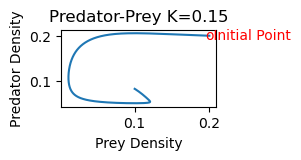

In [4]:
rmpp(.2,.2,.15)

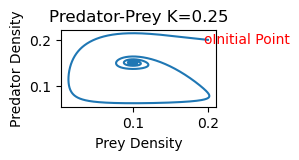

In [5]:
rmpp(.2,.2,.25)

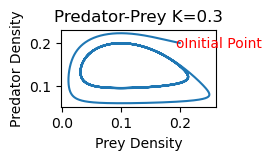

In [6]:
rmpp(.2,.2,.3)

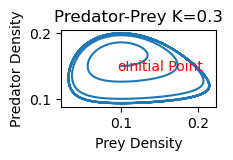

In [7]:
rmpp(.1,.15,.3)

Solution to Problem 3 

The transition of the steady state with positive densities of both prey and predator from stable to unstable occurs in what is called a Hopf bifurcation point. As explained in the previous section at larger values of K the prey-predator equilibrium loses its stability while at the same time a limit cycle emerges, that is a closed loop of prey and predator densities which all timeseries of dynamics of the model tend to approach.For more information on this: https://staff.fnwi.uva.nl/a.m.deroos/projects/QuantitativeBiology/43-HopfPoint-Rosenzweig.html

## Sensitive Dependence on Initial Conditions 


Solution to problem 1

The FHN bursting behavior is related to Hopf bifurcation in the 2D system. The interval quiescense (burst pattern 00000) occurs at a subcritical parameter values where the equilibrium is a stable spiral. The two large spikes(11) occur for parameter values across the Hopf bifurcation point due to a stable periodic solution in the underlying 2D system


 

Solution to Problem 2

a) After plugging in  x0=[1.725,.337,.00764] for the initial condition,  the burst pattern changes to 11000101000000



b) Sensitive dependence occurs in non-linear systems where the initial conditions have a large impact on the solution behavior. For the the FHN system, changing the initial condition only slightly $[1.744,.298,.00872]\rightarrow [1.725,.337,.00764]$ results in a completely different stable burst pattern.

## Random Walks

Solution to problem 1

a)

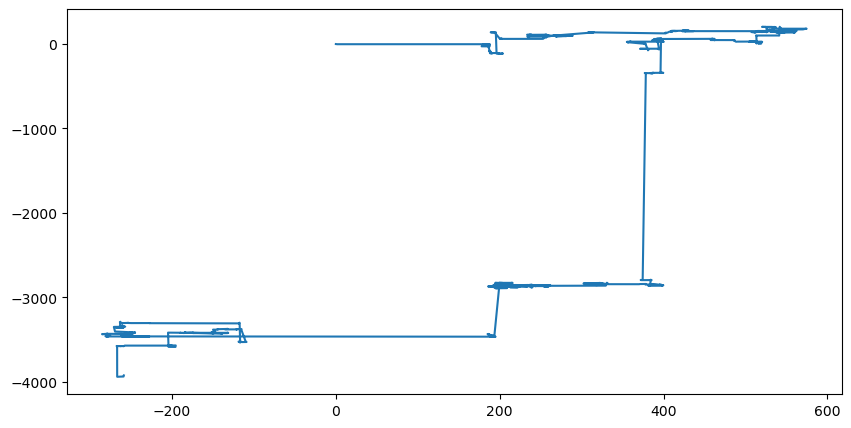

In [6]:
# Set seed for reproducible results (optional)
np.random.seed(10)

# Initial particle position
current_xpos = 0
current_ypos = 0

# Initial list of positions
x = [current_xpos]
y = [current_ypos]

# Define number of particle steps
N = 1000

# Generate set of random steps in advance (it could also be done inside the for loop

xstep=np.random.standard_cauchy(N)
ystep=np.random.standard_cauchy(N)

# Iterate and track the particle over each step
for i in range(N):
    
    # Update position
    current_xpos += xstep[i]
    current_ypos += ystep[i]
    
    # Append new position
    x.append(current_xpos)
    y.append(current_ypos)
    
# Plot random walk
plt.figure(figsize=(10,5))
plt.plot(x, y)

plt.show()    

b) Unlike Brownian motion, a Cauchy distribution has long "flights."

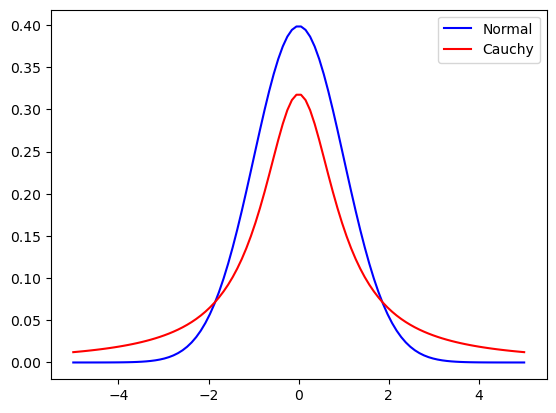

In [9]:
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma),color='b')
plt.plot(x, stats.cauchy.pdf(x, mu, sigma),color='red')
plt.legend(["Normal","Cauchy"])
plt.show()

2. a) Unlike a normal distribution with standard deviation s.d.=1, the Cauchy distribution (in red) wih a heavy tail has a significant probability for random draws more than 3 or less than -3. That is what causes the long flights in 1a).

b) In some contexts, long flights are catastrophic events (eg. stock market crash).

## Scale Adjusted Metropolitan Index

Solution to Exercise

Text(0.5, 1.0, 'SAMI with Hong Kong')

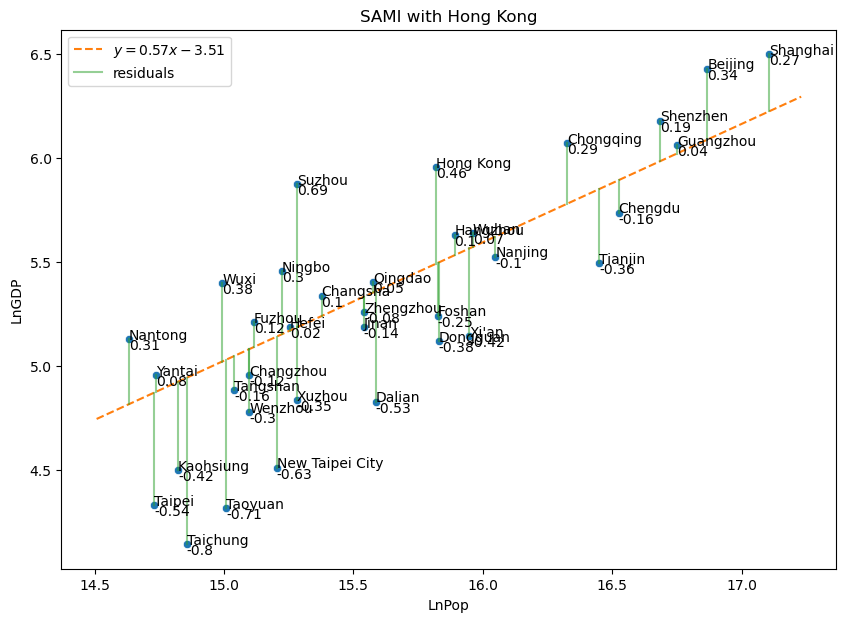

In [10]:
chinagdp = pd.read_excel('ChinaGDPwHongKong.xlsx')
for i in chinagdp.index:
    chinagdp.loc[i,"LnPop"]=np.log( chinagdp.loc[i,"Pop"])
    chinagdp.loc[i,"LnGDP"]=np.log( chinagdp.loc[i,"GDP"])
fig, axes = plt.subplots(1,1, sharex = True, sharey = True, figsize = (10,7))
slopes = [.5689]
intercepts = [-3.5082]
(scattercolor, trendcolor, residcolor) = sns.color_palette()[0:3]
# plot data
sns.scatterplot(
    data = chinagdp,
    x = 'LnPop',
    y = 'LnGDP',
    color = scattercolor,
    )
# plot the line with given slope and intercept
plot_abline(slopes[0], intercepts[0], color = trendcolor)
# plot residuals
for j, (x, y) in enumerate(zip(chinagdp['LnPop'], chinagdp['LnGDP'])):
    plt.plot(
        [x, x], [y, slopes[0]*x + intercepts[0]],
        color = residcolor, alpha = 0.5,
        label = "residuals" if j == 0 else "" # show legend entry only for first residual in each plot
    )
for j, (x, y) in enumerate(zip(chinagdp['LnPop'], chinagdp['LnGDP'])):
    plt.text(x,y,chinagdp.loc[j,"City"])
    plt.text(x,y-.05,str(np.round(y-(slopes[0]*x + intercepts[0]),2)))
plt.legend(loc = "upper left")
plt.savefig("ChinaSAMI.png")
plt.gca().set_title("SAMI with Hong Kong")

## IDP

**Solution to Problem 1**

1. Read in IDP data from the file "idp.xlsx"

In [7]:
#original filename = 'dtm-ethiopia-tigray-region-site-assessment-round-33-april-june-2023.xlsx'
filename="IDP.xlsx"
df = pd.read_excel(filename)
df.head(1)

,1.1.a.1: Survey Date,Country,Country Code,Reported Date,1.1.a.2: Survey Round,1.1.c.1: Site ID,1.1.d.1: Site Name,1.1.d.2: Site Alternate Name,1.4.a.2: Is site open?,1.1.e.1: Region,...,S1723: Other internet sources (e.g. apps),S1723: Please specify which other internet sources,S1723: Other,"S1723: If other source of news/information, please specify",S1784: Is mobile network access available in the site?,S1495: What % of HHs own a mobile phone?,11.3.a.1: Are members of the community discussing/advertising travel opportunities?,"11.3.a.6: If Yes, to where?",11.3.a.2: Specify all locations,M1712: Additional Comments / Observations
0,#date+occurred,#country+name,#country+code,#date+reported,NaN,NaN,NaN,NaN,NaN,#adm1+name,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


2. Select columns to assess  disorder.

In [8]:
#Pre-primary, secondary, resources,
#quality/satisfaction, girl attendance, boy attendance, teachers
columns_to_keep = ['1.1.d.1: Site Name',
                   '1.1.e.2: Zone',
                   '1.1.e.3: Woreda',
                   '1.1.f.1: GPS: Longitude',
                   '1.1.f.2: GPS: Latitude',
                   '2.1.b.7: Total Number of IDP Individuals',
                   'M1594: What is the severity of site/area overcrowding',
                   '1.2.a.1: Is there any registration activity?',
                   'What are the biggest priority need(s) for IDPs in this site?/Food',
                   'What are the biggest priority need(s) for IDPs in this site?/Shelter',
                   'What are the biggest priority need(s) for IDPs in this site?/WASH',
                   'What are the biggest priority need(s) for IDPs in this site?/Livelihoods',
                   'What are the biggest priority need(s) for IDPs in this site?/Healthcare',
                   'What are the biggest priority need(s) for IDPs in this site?/Protection services',
                   'S1225: Are IDPs satisfied with the standard of schools for children in their location',  
                   ]

data = df[columns_to_keep]
new_column_names = ['Name','Zone','Woreda','Long','Lat','Pop','Crowded','Registration','Food','Shelter','WASH','Livelihood','Healthcare','Protection','Education']
data.columns = new_column_names
data=data.dropna()
data.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education
1,Hareze Seb'ata,Eastern,Erob,39.5828,14.43946,10410,High,"Yes, but the list is incomplete",No,Yes,Yes,Yes,No,No,No


In [9]:
data.shape

(642, 15)

3) Binary code deficiencies (1=deficient)

In [10]:
# Assuming 'data' is your DataFrame with qualitative columns

# Define mapping functions for each column
def map_crowded(value):
    return 1 if 'High' in value else 0

def map_registration(value):
    return 1 if 'No' in value else 0

def map_food(value):
    return 1 if 'Yes' in value else 0

def map_shelter(value):
    return 1 if 'Yes' in value else 0

def map_wash(value):
    return 1 if 'Yes' in value else 0

def map_livelihood(value):
    return 1 if 'Yes' in value else 0

def map_healthcare(value):
    return 1 if 'Yes' in value else 0

def map_protection(value):
    return 1 if 'Yes' in value else 0

def map_education(value):
    return 1 if 'No' in value else 0

# Apply the mapping functions to each column
data['Crowded'] = data['Crowded'].apply(map_crowded)
data['Registration'] = data['Registration'].apply(map_registration)
data['Food'] = data['Food'].apply(map_food)
data['Shelter'] = data['Shelter'].apply(map_shelter)
data['WASH'] = data['WASH'].apply(map_wash)
data['Livelihood'] = data['Livelihood'].apply(map_livelihood)
data['Healthcare'] = data['Healthcare'].apply(map_healthcare)
data['Protection'] = data['Protection'].apply(map_protection)
data['Education'] = data['Education'].apply(map_education)


# Display the updated DataFrame
data.head()



,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education
1,Hareze Seb'ata,Eastern,Erob,39.58280,14.43946,10410,1,0,0,1,1,1,0,0,1
2,Enda Mosa,Eastern,Erob,39.55493,14.42384,10230,1,0,1,1,0,1,0,0,1
3,Adi Abagie,North Western,Adi Daero,38.18660,14.26590,196,0,1,1,0,0,0,0,0,1
4,May Ambssa,North Western,Adi Daero,38.23350,14.22740,117,0,1,1,0,0,0,0,0,1
5,Hibret,North Western,Adi Daero,38.16930,14.32020,242,0,1,1,1,0,0,0,0,1


4) Find the total number of needs in each camp and the total number of IDP $pop_i$ in camps with i needs.

In [11]:
for i in data.index:
    data.loc[i,"sum"]=int(data.loc[i,'Crowded']+data.loc[i,'Registration']+data.loc[i,'Food']+data.loc[i,'Shelter']+data.loc[i,'WASH']+data.loc[i,'Livelihood']+data.loc[i,'Healthcare']+data.loc[i,'Protection']+data.loc[i,'Education'])
data.head(3)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
1,Hareze Seb'ata,Eastern,Erob,39.58280,14.43946,10410,1,0,0,1,1,1,0,0,1,5.0
2,Enda Mosa,Eastern,Erob,39.55493,14.42384,10230,1,0,1,1,0,1,0,0,1,5.0
3,Adi Abagie,North Western,Adi Daero,38.18660,14.26590,196,0,1,1,0,0,0,0,0,1,3.0


In [15]:
def needlevel(data):
    pop=[0,0,0,0,0,0,0,0,0,0]
    for i in data.index:
        if data.loc[i,"sum"]==0:
            pop[0]=pop[0]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==1:
            pop[1]=pop[1]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==2:
            pop[2]=pop[2]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==3:
            pop[3]=pop[3]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==4:
            pop[4]=pop[4]++data.loc[i,"Pop"]
        if data.loc[i,"sum"]==5:
            pop[5]=pop[5]+data.loc[i,"Pop"] 
        if data.loc[i,"sum"]==6:
            pop[6]=pop[6]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==7:
            pop[7]=pop[7]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==8:
            pop[8]=pop[8]+data.loc[i,"Pop"]
        if data.loc[i,"sum"]==9:
            pop[9]=pop[9]++data.loc[i,"Pop"]
    return pop

In [16]:
totalpop=needlevel(data)
np.sum(totalpop)

1021593

In [17]:
central_df = data[data['Zone'] == 'Central']
centralpop=needlevel(central_df)
central_df.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
9,Kewanit,Central,Tahtay Maychew,38.634,14.0922,136,0,0,1,0,1,0,1,0,1,4.0


In [18]:
centralpop

[0, 185, 66443, 98460, 34418, 24262, 0, 0, 0, 0]

In [19]:
NW_df = data[data['Zone'] == 'North Western']
NWpop=needlevel(NW_df)
NW_df.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
3,Adi Abagie,North Western,Adi Daero,38.1866,14.2659,196,0,1,1,0,0,0,0,0,1,3.0


In [20]:
NWpop

[0, 5917, 84960, 105586, 78965, 34967, 5242, 0, 0, 0]

In [21]:
eastern_df = data[data['Zone'] == 'Eastern']
easternpop=needlevel(eastern_df)
eastern_df.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
1,Hareze Seb'ata,Eastern,Erob,39.5828,14.43946,10410,1,0,0,1,1,1,0,0,1,5.0


In [22]:
easternpop

[0, 702, 44725, 47223, 14953, 24134, 23113, 0, 0, 0]

In [23]:
# Filter rows with 'Mekele' in the 'City' column
SE_df = data[data['Zone'] == 'South East']
SEpop=needlevel(SE_df)
SE_df.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
263,Adi-Keyh,South East,Wejerat,39.667,13.0126,326,0,0,1,0,0,0,0,0,1,2.0


In [24]:
SEpop

[0, 469, 11772, 9957, 12005, 0, 0, 0, 0, 0]

In [25]:
mekelle_df = data[data['Zone'] == 'Mekelle']
mekellepop=needlevel(mekelle_df)
mekelle_df.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
559,Hayelom Elementary School,Mekelle,Hawelti Sub City,39.45346,13.50069,1760,0,1,1,0,0,1,0,0,0,3.0


In [26]:
mekellepop

[0, 14009, 79426, 78206, 29365, 33478, 0, 0, 0, 0]

In [27]:
southern_df = data[data['Zone'] == 'Southern']
southernpop=needlevel(southern_df)
southern_df.head(1)

,Name,Zone,Woreda,Long,Lat,Pop,Crowded,Registration,Food,Shelter,WASH,Livelihood,Healthcare,Protection,Education,sum
295,Ebo,Southern,Raya Azebo,39.6911,12.8469,123,0,0,1,1,0,1,0,0,1,4.0


In [37]:
southernpop

[0, 0, 3203, 10645, 33313, 11490, 0, 0, 0, 0]

5) Compute the mean, weighted mean, entropy, and deficiency entropy for each zone.

In [29]:
import pandas as pd
import numpy as np

def D(pop):
    n=np.sum(pop)
    N=1021593
    ###Compute H and Hw
    H=0
    Hd=0 
    for i in np.arange(0,10,1):
        if pop[i]>0:
            H=H-(pop[i]/n)*np.log(pop[i]/n)
            Hd=Hd-pop[i]*i*(pop[i]/n)*np.log(pop[i]/n) 
    Hd=Hd/N
    H=np.round(H,3)
    Hd=np.round(Hd,3)
    ### Computed mean and weighted mean
    m=0
    mw=0
    for i in np.arange(1,10,1):
        m=m + i*pop[i]/n
        mw=mw + pop[i]*i*(pop[i]/n) 
    mw=mw/N
    m=np.round(m,3)
    mw=np.round(mw,3)
    return H,m,mw,Hd   

In [30]:
[CH,Cm,Cmw,CHd]=D(centralpop)
print("Central Zone Entropy=",CH)
print("Central Zone Mean=",Cm)
print("Central Zone Weighted Mean=",Cmw)
print("Central Zone Deficiency Entropy=",CHd)

Central Zone Entropy= 1.256
Central Zone Mean= 3.072
Central Zone Weighted Mean= 0.199
Central Zone Deficiency Entropy= 0.219


In [31]:
[NWH,NWm,NWmw,NWHd]=D(NWpop)
print("NW Zone Entropy=",NWH)
print("NW Zone Mean=",NWm)
print("NW Zone Weighted Mean=",NWmw)
print("NW Zone Deficiency Entropy=",NWHd)

NW Zone Entropy= 1.453
NW Zone Mean= 3.215
NW Zone Weighted Mean= 0.245
NW Zone Deficiency Entropy= 0.324


In [32]:
[EH,Em,Emw,EHd]=D(easternpop)
print("Eastern Zone Entropy=",EH)
print("Eastern Zone Mean=",Em)
print("Eastern Zone Weighted Mean=",Emw)
print("Eastern Zone Deficiency Entropy=",EHd)

Eastern Zone Entropy= 1.545
Eastern Zone Mean= 3.558
Eastern Zone Weighted Mean= 0.112
Eastern Zone Deficiency Entropy= 0.168


In [33]:
[SEH,SEm,SEmw,SEHd]=D(SEpop)

print("SE Zone Entropy=",SEH)
print("SE Zone Mean=",SEm)
print("SE Zone Weighted Mean=",SEmw)
print("SE Zone Deficiency Entropy=",SEHd)

SE Zone Entropy= 1.153
SE Zone Mean= 2.979
SE Zone Weighted Mean= 0.033
SE Zone Deficiency Entropy= 0.036


In [34]:
[MH,Mm,Mmw,MHd]=D(mekellepop)
print("Mekelle Zone Entropy=",MH)
print("Mekelle Zone Mean=",Mm)
print("Mekelle Zone Weighted Mean=",Mmw)
print("Mekelle Zone Deficiency Entropy=",MHd)

Mekelle Zone Entropy= 1.439
Mekelle Zone Mean= 2.953
Mekelle Zone Weighted Mean= 0.168
Mekelle Zone Deficiency Entropy= 0.219


In [35]:
[SH,Sm,Smw,SHd]=D(southernpop)
print("Southern Zone Entropy=",SH)
print("Southern Zone Mean=",Sm)
print("Southern Zone Weighted Mean=",Smw)
print("Southern Zone Deficiency Entropy=",SHd)

Southern Zone Entropy= 1.109
Southern Zone Mean= 3.905
Southern Zone Weighted Mean= 0.091
Southern Zone Deficiency Entropy= 0.071


**Solution to Problem 2**

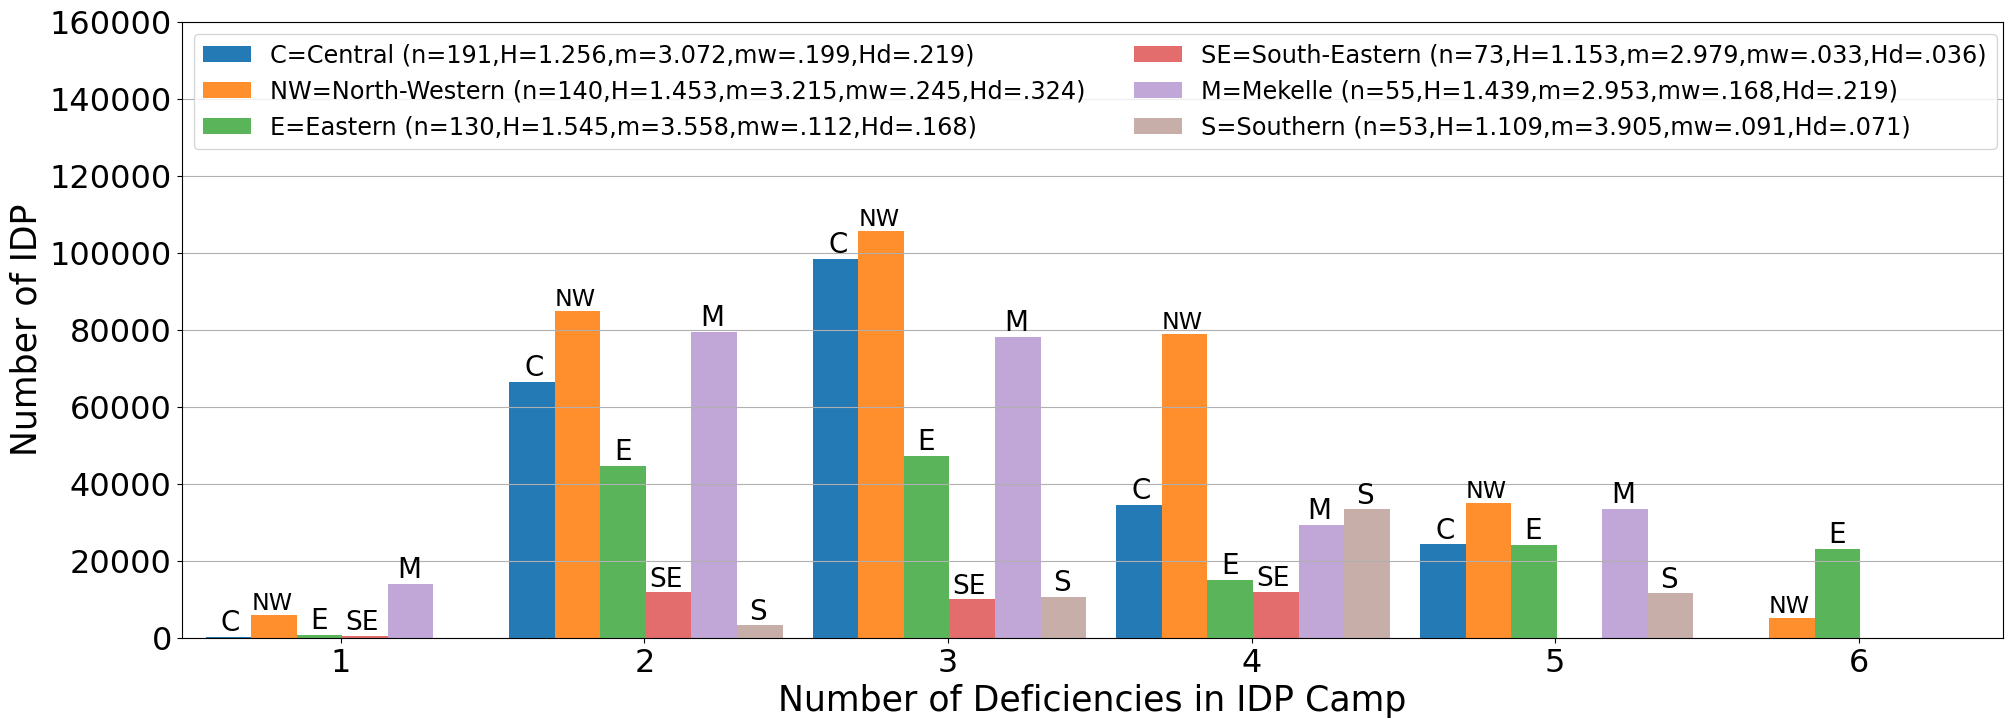

In [36]:
import matplotlib.pyplot as plt
count=('0','1','2','3','4','5','6','7','8','9')
frequency = {
    'C=Central (n=191,H=1.256,m=3.072,mw=.199,Hd=.219)': centralpop,
    'NW=North-Western (n=140,H=1.453,m=3.215,mw=.245,Hd=.324)': NWpop,
    'E=Eastern (n=130,H=1.545,m=3.558,mw=.112,Hd=.168)':easternpop,
    'SE=South-Eastern (n=73,H=1.153,m=2.979,mw=.033,Hd=.036)':SEpop,
    'M=Mekelle (n=55,H=1.439,m=2.953,mw=.168,Hd=.219)':mekellepop,
    'S=Southern (n=53,H=1.109,m=3.905,mw=.091,Hd=.071)':southernpop,
}
x = np.arange(len(count))  # the label locations
xpos=[0,1,2,3,4,5,6,7,8,9]
width=.15
multiplier=.2

plt.figure(figsize=(23.5,8))

for attribute, measurement in frequency.items():
    offset = .125+width * multiplier
    rects = plt.gca().bar(x + offset, measurement, width, label=attribute, alpha=1-multiplier*.1)
    #plt.gca().bar_label(rects, padding=3)
    multiplier += 1
    
# Add some text for labels, title and custom x-axis tick labels, etc.
plt.gca().set_xlabel('Number of Deficiencies in IDP Camp',fontsize=25)
plt.gca().set_ylabel("Number of IDP",fontsize=25)
plt.gca().set_xticks(x + 3.5*width, count)
for i in np.arange(1,7,1):
    if centralpop[i]>0:
        plt.gca().text(xpos[i]+.13,centralpop[i],'C',size=20,ha='left',va='bottom')
    if NWpop[i]>0:
        plt.gca().text(xpos[i]+.23,NWpop[i]+.25,'NW',size=17,ha='left',va='bottom')
    if easternpop[i]>0:
        plt.gca().text(xpos[i]+.425,easternpop[i]+.1,'E',size=20,ha='left',va='bottom')
    if SEpop[i]>0:
        plt.gca().text(xpos[i]+.54,SEpop[i]+.25,'SE',size=19,ha='left',va='bottom')
    if mekellepop[i]>0:
        plt.gca().text(xpos[i]+.71,mekellepop[i]+.1,'M',size=20,ha='left',va='bottom')
    if southernpop[i]>0:
        plt.gca().text(xpos[i]+.87,southernpop[i]+.1,'S',size=20,ha='left',va='bottom')
plt.gca().legend(loc='upper left', fontsize="17.3",ncols=2)
plt.gca().set_ylim(0, 160000)
plt.gca().set_xlim(1,7)
plt.xticks(fontsize= 23)
plt.yticks(fontsize= 23)
plt.grid(axis='y')
plt.savefig("fig2.png")
plt.show()

## References


Bertin, E. 2021. *Statistical Physics of Complex Systems: A Concise Introduction (3rd Edition)*. Cham, Switzerland: Springer Nature.

Bettencourt, L. 2022. *Introduction to Urban Science: Evidence and Theory of Cities as Complex Systems.* Cambridge, MA: The MIT Press.

Fieguth, P. 2021.*An Introduction to Complex Systems: Society, Ecology, and Nonlinear Dynamics (2nd Edition)*. Cham, Switzerland: Springer Nature.




Ghosh, A. 2017.  *Dynamic Systems for Everyone: Understanding how our world works. (2E)*  Cham, Switzerland: Springer.

Isihara P, Diedrichs DR, Kartawijaya T, Townsend E, and Tully K. 2017. Disaster Relief Modeling, The UMAP Journal, Vol. 38(4):399-430.  

Macauley, T.   2017. RIoT Control Understanding and Managing Risks and the Internet of Things. Amsterdam: Elsevier.

Martin, B. and de Roos, A. 2023. Hopf bifurcation in a predator-prey model. https://staff.fnwi.uva.nl/a.m.deroos/projects/QuantitativeBiology/43-HopfPoint-Rosenzweig.html

Murray, J.D. 2002. *Mathematical Biology: I. An Introduction (3E).* New York: Springer.

Sampson, R. 2012. *Great American City: Chicago and the Enduring Neighborhood Effect.* Chicago: The University of Chicago Press. 



Siegenfeld, A. and Bar-Yam, Y. 2020. An introduction to complex system science and its applications. https://www.hindawi.com/journals/complexity/2020/6105872/

Tranquillo, J. 2019. An Introduction to Complex Systems: Making Sense of a Changing World. Cham, Switzerland: Springer Nature.
